<a href="https://colab.research.google.com/github/spe301/AI-generated-AI/blob/main/AI_generated_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Potosnail==0.2.3

In [2]:
import pandas as pd
import numpy as np
from potosnail import *

ml = MachineLearning()
dl = DeepLearning()
dh = DataHelper()
ev = Evaluater()
al = Algorithms()
wr = Wrappers()
st = Stats()

def SuperBear(df, gridding=False):
  dh = DataHelper()
  '''gets the nlp results dataset ready for modeling'''
  df['regularizer'] = df['regularizer'].fillna('None')
  df['stacking'] = df['stacking'].astype(int)
  df['dropout'] = df['dropout'].astype(int)
  df['bidirectional'] = df['bidirectional'].astype(int)
  act = dh.OHE(df['activation'])
  reg = dh.OHE(df['regularizer'])
  opt = dh.OHE(df['optimizer'])
  method = dh.OHE(df['method'])
  df = df.drop(['activation', 'regularizer', 'optimizer', 'method'], axis='columns')
  df = pd.concat([df, act, reg, opt, method], axis='columns')
  if gridding == True:
    return df
  df['val_loss'] = df['val_loss'].fillna(max(df['val_loss']))
  df['loss'] = df['loss'].fillna(max(df['loss']))
  kpi_list = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
  kpi = df[kpi_list]
  scores = []
  for i in range(len(df)):
    ts = (1 - (kpi['loss'][i] / max(kpi['loss'])) + kpi['accuracy'][i])/2
    vs = (1 - (kpi['val_loss'][i] / max(kpi['val_loss'])) + kpi['val_accuracy'][i])/2
    score = (ts+vs) - abs(ts-vs)
    scores.append(score)
  df2 = df.drop(kpi_list, axis='columns')
  df2['quality'] = scores
  return df2

def BunnyPinkears(params, len_dataset, n_features, dominant_class):
  '''puts all possible gridsearch combinations in a dataframe'''
  n = list(params.keys())
  lst1 = []
  lst2 = []
  lst3 = []
  lst4 = []
  lst5 = []
  lst6 = []
  lst7 = []
  lst8 = []
  lst9 = []
  lst10 = []
  lst11 = []
  lst12 = []
  for i in range(len(params[n[0]])):
    var1 = params[n[0]][i]
    for i in range(len(params[n[1]])):
      var2 = params[n[1]][i]
      for i in range(len(params[n[2]])):
        var3 = params[n[2]][i]
        for i in range(len(params[n[3]])):
          var4 = params[n[3]][i]
          for i in range(len(params[n[4]])):
            var5 = params[n[4]][i]
            for i in range(len(params[n[5]])):
              var6 = params[n[5]][i]
              for i in range(len(params[n[6]])):
                var7 = params[n[6]][i]
                for i in range(len(params[n[7]])):
                  var8 = params[n[7]][i]
                  for i in range(len(params[n[8]])):
                    var9 = params[n[8]][i]
                    for i in range(len(params[n[9]])):
                      var10 = params[n[9]][i]
                      for i in range(len(params[n[10]])):
                        var11 = params[n[10]][i]
                        for i in range(len(params[n[11]])):
                          var12 = params[n[11]][i]
                          lst1.append(var1)
                          lst2.append(var2)
                          lst3.append(var3)
                          lst4.append(var4)
                          lst5.append(var5)
                          lst6.append(var6)
                          lst7.append(var7)
                          lst8.append(var8)
                          lst9.append(var9)
                          lst10.append(var10)
                          lst11.append(var11)
                          lst12.append(var12)
  df = pd.DataFrame(lst1)
  df.columns = [n[0]]
  df[n[1]] = lst2
  df[n[2]] = lst3
  df[n[3]] = lst4
  df[n[4]] = lst5
  df[n[5]] = lst6
  df[n[6]] = lst7
  df[n[7]] = lst8
  df[n[8]] = lst9
  df[n[9]] = lst10
  df[n[10]] = lst11
  df[n[11]] = lst12
  df['len_dataset'] = [len_dataset] * len(df)
  df['n_features'] = [n_features] * len(df)
  df['dominant_class'] = [dominant_class] * len(df)
  return df

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/spe301/AI-generated-AI/main/Data/NLP8.csv').drop(['Unnamed: 0'], axis='columns')
#train, val = dh.HoldOut(df)

grid = {'output_dim': [2], #because we have 2 classes
          'embedding': [45589], #vocab is number of unique words in dataset
          'nodes': list(range(32, 68, 4)), #we will test between 32 and 64 nodes for the first layer
          'activation': ['tanh', 'relu'], #we will test between relu and tanh for activation function
          'regularizer': ['L1', None, 'L2'], #we will use L1 reqularization to prevent overfitting
          'stacking': [False, True], #stacking makes the first 2 layers the same, we will not do this
          'dropout': [False, True], #we will not use dropout because we are already using L1 regularization
          'optimizer': ['adam', 'rmsprop', 'sgd'], #we will test between adam and rmsprop for optimization function
          'method': ['LSTM', 'GRU'], #we will test between using an LSTM cell and a GRU cell
          'bidirectional': [True, False], 'epochs': list(range(5, 60, 5)), 'batch_size': [32, 64]}

def ModelBuilder(df, task):
  if task == 'NLP':
    df2 = SuperBear(df)
  vanilla, grid, X, Xval, y, yval = wr.Vanilla(df2, 'quality', 'regression')
  scaler = al.PickScaler(X, y, vanilla)
  Xs = dh.ScaleData(scaler, X)
  model = ml.Optimize(vanilla, grid, Xs, y)
  return model, scaler

def PredictCombos(df, grid, task, len_dataset=0, n_features=0, dominant_class=0.5): #X, y, Xval, yval
  model, scaler = ModelBuilder(df, task)
  combinations = SuperBear(BunnyPinkears(grid, len_dataset, n_features, dominant_class), gridding=True)
  if len(kit) == 5:
    cols = list(kit[1].drop(['quality'], axis='columns').columns)
  if len(kit) == 7:
    cols = list(kit[1].columns)
  try:
    c2 = combinations[cols]
  except:
    c2 = dh.ScaleData(kit[:-2], combinations)[cols]
  c2['quality'] = model.predict(c2)
  return kit

In [8]:
ModelBuilder(df, 'NLP')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.1s finished


(DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'standard')

In [7]:
PredictCombos(df, grid, 'NLP', len_dataset=360, n_features=1724)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.2s finished


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.6s finished


ValueError: ignored

In [94]:
kit = wr.RegLoop(SuperBear(df), 'quality', quiet=False)
list(kit.values())[0][0].predict(list(kit.values())[0][3])

76.5% accuracy, untuned model, raw data
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


80.94% accuracy, tuned model, raw data
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


74.33% accuracy, tuned model, data is scaled with standard scaler
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


13.51% accuracy, tuned model, features have been reduced to 5


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.7s finished


ValueError: ignored

In [15]:
train, val = dh.HoldOut(nlp2)

In [16]:
kit = wr.WrapML(train, 'quality', 'regression', quiet=False)

72.56% accuracy, untuned model, raw data
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


71.43% accuracy, tuned model, raw data
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


80.98% accuracy, tuned model, data is scaled with standard scaler
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


20.56% accuracy, tuned model, features have been reduced to 5


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.6s finished


In [17]:
model = list(kit.values())[0][0]
X = list(kit.values())[0][1]
y = list(kit.values())[0][2]
Xval = val.drop(['quality'], axis='columns')
yval = val['quality']

In [18]:
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
'''grid = {'max_depth': [11, 12, 13], 'max_leaf_nodes': [9, 12, 15], 'min_samples_leaf': [3, 4]}

clf = ml.Optimize(model, grid, X, y)
clf'''

"grid = {'max_depth': [11, 12, 13], 'max_leaf_nodes': [9, 12, 15], 'min_samples_leaf': [3, 4]}\n\nclf = ml.Optimize(model, grid, X, y)\nclf"

In [20]:
ev.EvaluateRegressor(model, X, Xval, y, yval)

(     predicted    actual     error    %error
 0     1.154930  1.136725  0.018204  0.984238
 1     1.142370  1.128174  0.014196  0.987573
 2     1.104107  1.133143  0.029035  2.562384
 3     1.123472  1.138898  0.015426  1.354444
 4     1.427865  1.426996  0.000869  0.999391
 ..         ...       ...       ...       ...
 195   0.500000  0.500000  0.000000  0.000000
 196   1.457593  1.487217  0.029624  1.991884
 197   1.388665  1.365349  0.023316  0.983210
 198   0.500000  0.500000  0.000000  0.000000
 199   1.165965  1.081516  0.084449  0.927571
 
 [200 rows x 4 columns], 0.012085341723610971, 70.56)

In [21]:
X = np.array(X)
Xval = np.array(Xval)
y = np.array(y)
yval = np.array(yval)

In [22]:
dm = dl.FastNN('regression', 'mse', output_dim=1)
history = dm.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
41/41 [==============================] - 1s 12ms/step - loss: 433090.1187 - val_loss: 4694.1646
Epoch 2/150
41/41 [==============================] - 0s 2ms/step - loss: 2372.1694 - val_loss: 103.0036
Epoch 3/150
41/41 [==============================] - 0s 3ms/step - loss: 41.3307 - val_loss: 0.7357
Epoch 4/150
41/41 [==============================] - 0s 2ms/step - loss: 1.1027 - val_loss: 0.5430
Epoch 5/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5857 - val_loss: 0.5167
Epoch 6/150
41/41 [==============================] - 0s 2ms/step - loss: 0.6438 - val_loss: 0.5198
Epoch 7/150
41/41 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.4878
Epoch 8/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5508 - val_loss: 0.4947
Epoch 9/150
41/41 [==============================] - 0s 3ms/step - loss: 0.5500 - val_loss: 0.4770
Epoch 10/150
41/41 [==============================] - 0s 2ms/step - loss: 0.5452 - val_loss: 0

In [23]:
dm.evaluate(Xval, yval)

7/7 [==============================] - 0s 1ms/step - loss: 0.4871


0.4870617985725403

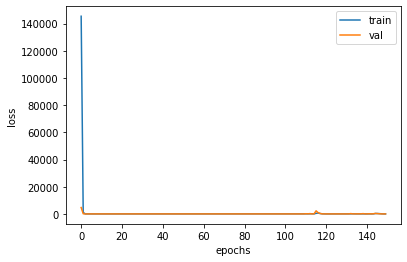

In [24]:
ev.ViewLoss(history)

In [25]:
def BunnyPinkears(params, len_dataset, n_features, dominant_class):
  '''puts all possible gridsearch combinations in a dataframe'''
  n = list(params.keys())
  lst1 = []
  lst2 = []
  lst3 = []
  lst4 = []
  lst5 = []
  lst6 = []
  lst7 = []
  lst8 = []
  lst9 = []
  lst10 = []
  lst11 = []
  lst12 = []
  for i in range(len(params[n[0]])):
    var1 = params[n[0]][i]
    for i in range(len(params[n[1]])):
      var2 = params[n[1]][i]
      for i in range(len(params[n[2]])):
        var3 = params[n[2]][i]
        for i in range(len(params[n[3]])):
          var4 = params[n[3]][i]
          for i in range(len(params[n[4]])):
            var5 = params[n[4]][i]
            for i in range(len(params[n[5]])):
              var6 = params[n[5]][i]
              for i in range(len(params[n[6]])):
                var7 = params[n[6]][i]
                for i in range(len(params[n[7]])):
                  var8 = params[n[7]][i]
                  for i in range(len(params[n[8]])):
                    var9 = params[n[8]][i]
                    for i in range(len(params[n[9]])):
                      var10 = params[n[9]][i]
                      for i in range(len(params[n[10]])):
                        var11 = params[n[10]][i]
                        for i in range(len(params[n[11]])):
                          var12 = params[n[11]][i]
                          lst1.append(var1)
                          lst2.append(var2)
                          lst3.append(var3)
                          lst4.append(var4)
                          lst5.append(var5)
                          lst6.append(var6)
                          lst7.append(var7)
                          lst8.append(var8)
                          lst9.append(var9)
                          lst10.append(var10)
                          lst11.append(var11)
                          lst12.append(var12)
  df = pd.DataFrame(lst1)
  df.columns = [n[0]]
  df[n[1]] = lst2
  df[n[2]] = lst3
  df[n[3]] = lst4
  df[n[4]] = lst5
  df[n[5]] = lst6
  df[n[6]] = lst7
  df[n[7]] = lst8
  df[n[8]] = lst9
  df[n[9]] = lst10
  df[n[10]] = lst11
  df[n[11]] = lst12
  df['len_dataset'] = [len_dataset] * len(df)
  df['n_features'] = [n_features] * len(df)
  df['dominant_class'] = [dominant_class] * len(df)
  return df
                    
                    
grid = {'output_dim': [2], #because we have 2 classes
          'embedding': [45589], #vocab is number of unique words in dataset
          'nodes': list(range(32, 68, 4)), #we will test between 32 and 64 nodes for the first layer
          'activation': ['tanh', 'relu'], #we will test between relu and tanh for activation function
          'regularizer': ['L1', None, 'L2'], #we will use L1 reqularization to prevent overfitting
          'stacking': [False, True], #stacking makes the first 2 layers the same, we will not do this
          'dropout': [False, True], #we will not use dropout because we are already using L1 regularization
          'optimizer': ['adam', 'rmsprop', 'sgd'], #we will test between adam and rmsprop for optimization function
          'method': ['LSTM', 'GRU'], #we will test between using an LSTM cell and a GRU cell
          'bidirectional': [True, False], 'epochs': list(range(5, 60, 5)), 'batch_size': [32, 64]}

InpGrid = BunnyPinkears(grid, 360, 17, 0.5)    
NlpGrid = SuperBear(InpGrid, gridding=True)
NlpGrid

,output_dim,embedding,nodes,stacking,dropout,bidirectional,epochs,batch_size,len_dataset,n_features,dominant_class,relu,tanh,L1,L2,None,adam,rmsprop,sgd,GRU,LSTM
0,2,45589,32,0,0,1,5,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,45589,32,0,0,1,5,64,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,45589,32,0,0,1,10,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,45589,32,0,0,1,10,64,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,45589,32,0,0,1,15,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57019,2,45589,64,1,1,0,45,64,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
57020,2,45589,64,1,1,0,50,32,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
57021,2,45589,64,1,1,0,50,64,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
57022,2,45589,64,1,1,0,55,32,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [26]:
NlpGrid['quality'] = model.predict(NlpGrid)
NlpGrid

,output_dim,embedding,nodes,stacking,dropout,bidirectional,epochs,batch_size,len_dataset,n_features,dominant_class,relu,tanh,L1,L2,None,adam,rmsprop,sgd,GRU,LSTM,quality
0,2,45589,32,0,0,1,5,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.387853
1,2,45589,32,0,0,1,5,64,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.387853
2,2,45589,32,0,0,1,10,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.185807
3,2,45589,32,0,0,1,10,64,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.185807
4,2,45589,32,0,0,1,15,32,360,17,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.185807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57019,2,45589,64,1,1,0,45,64,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.158815
57020,2,45589,64,1,1,0,50,32,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.158815
57021,2,45589,64,1,1,0,50,64,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.158815
57022,2,45589,64,1,1,0,55,32,360,17,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.158815


In [27]:
res = dict(NlpGrid.loc[NlpGrid['quality'] == max(NlpGrid['quality'])].iloc[0])

if res['relu'] == 1:
  activation = 'relu'
if res['tanh'] == 1:
  activation = 'tanh'
if res['L1'] == 1:
  regularizer = 'L1' 
if res['L2'] == 1:
  regularizer = 'L2' 
if res['None'] == 1:
  regularizer = 'None' 
if res['adam'] == 1:
  optimizer = 'adam'
if res['rmsprop'] == 1:
  optimizer = 'rmsprop'
if res['sgd'] == 1:
  optimizer = 'sgd'
if res['GRU'] == 1:
  method = 'GRU'
if res['LSTM'] == 1:
  method = 'LSTM' 

In [30]:
dm3 = dl.RNN(int(res['output_dim']), int(res['embedding']), int(res['nodes']), activation, regularizer, bool(res['stacking']), bool(res['dropout']), optimizer, method, bool(res['bidirectional']))
dm3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          1458848   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 32)          10368     
_________________________________________________________________
dense_4 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_5 (Dense)              (None, None, 2)           34        
Total params: 1,486,418
Trainable params: 1,486,418
Non-trainable params: 0
_________________________________________________________________
